In [11]:
%run ./Functions_PM.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

# m_1 = 10
# m_2 = 10
# R_S = 2*(m_1 + m_2)
# x_1 = np.array([-100., -10.])
# x_2 = np.array([0.,      0.])
# v_1 = np.array([0.,    0.07])
# v_2 = np.array([0.,      0.])

m_1 = 10*M_sun
m_2 = 50*M_sun
R_S = 2*(m_1 + m_2)*G
x_1 = np.array([-1000., 10.])*R_S
x_2 = np.array([0.,      0.])*R_S
p_1 = np.array([0., 0.01])
p_2 = np.array([0.,      0.])
P_1 = np.array([np.sqrt(np.dot(p_1, p_1) + m_1**2), p_1[0], p_1[1]])
P_2 = np.array([np.sqrt(np.dot(p_2, p_2) + m_2**2), p_2[0], p_2[1]])

s = x_1, x_2, P_1, P_2, m_1, m_2

In [12]:
t_max = 1e6*R_S/c
dt = t_max/1e5
pos1, pos2, pos_CM = run_model(s, t_max = t_max, dt = dt, mode = 'PM')

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

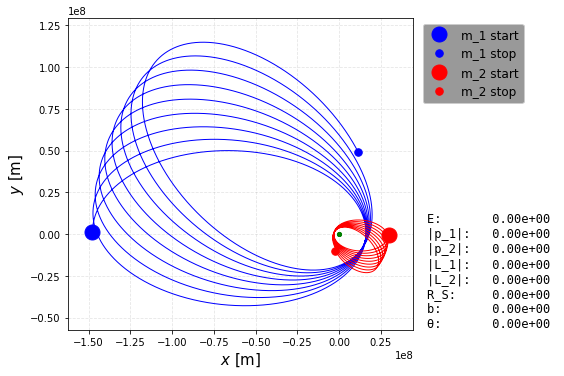

In [ ]:
M = slice(0, int(len(pos1[0])), 1)
orbPlotter(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = False)

# lim = 2e11
# lims = (-lim, lim)
# orbPlotter_lims(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = False, xlim=lims, ylim=lims)

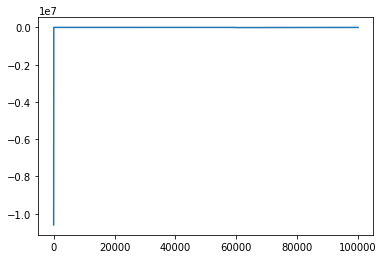

In [ ]:
travel = []
for i in range(len(pos1[0])):
    travel.append(pos1[0,i] - pos1[0, i-1])

t = np.linspace(0,len(travel),len(travel))
plt.plot(t, travel)

In [ ]:
import numpy as np
P_1 = np.array([0,1,2,3])

p_1 = P_1[1:4]
p_1

x_1 = np.array([0,1])
x_2 = np.array([2,3])

r_vec = [0, x_1 - x_2]



IndexError: list index out of range